---
>「私たちがここにいるのには理由があります。\
>松明を掲げて、暗闇の中にいる人々を導く役割があると信じています」\
>ウーピー・ゴールドバーグ
---

# PyTorch

PyTorch は科学技術計算向けパッケージであり、
- GPUを使った高速計算が可能
  - 普通やらないがNumPyの代わりに使える
  - NumPyをGPU付きで使いたいならCuPyがある\
    PyTorchによりも先に登場したPFNのChainerはCuPyを使う
- 柔軟かつ高速にディープラーニングプラットフォームを構築可能
である。

https://pytorch.org/ にほぼすべての情報がある。

英語ではあるが、関連するドキュメントが十分かつ分かりやすく準備されている

PyTorchの以前のロゴは次の通り

<img src="http://class.west.sd.keio.ac.jp/dataai/text/pytorchlogo.jpeg" width="50%">

リングフィットアドベンチャーに似ているので変えたとか変えないとか

<img src="http://class.west.sd.keio.ac.jp/dataai/text/rfa.png" width="20%">

# PyTorchの基本

PyTorchを用いて学習させる場合、Define-by-Runであることから、Backword演算つまり誤差逆伝搬を行う際には、その前に必ずForward演算つまり順伝搬を行う必要がある
- 順伝搬を求める際に、PyTorchの機能であるAutograd(自動微分)を使って逆演算を求めることができるようになっている
- Define-by-Runであることから、例えばif文で分岐しようが、混ぜようが、分岐しようが、最適化可能である

## PyTorchプログラムの形

基本的にPyTorchを用いた学習プログラムは次のスタイルになる
1. データの準備
  - データローダの設定などを行う
  - データの準備と学習モデルに入力するための前準備
  - データ拡張(少ないデータでは学習が進まないため、データを加工して数を増やす手法)などもここで行う
  - 実はこの部分の設計が最も厄介であり、センスが問われる場所でもある
  - 最もデータサイエンティストとしてのセンスが問われる場所
2. モデルの定義
- DNNのネットワークの定義を行う
  - PyTorchのtorch.nnにある関数やPyTorchの算術関数などを利用する
  - 逆伝搬は自動的に計算されるため、順伝搬のみ記述すればよい

  ```
  class myModel(nn.Module):
    def __init__(self, 必要に応じて初期設定):
      super(myModel, self).__init__()
      利用するnnクラスの関数の定義など
    def forward(self, ...):
      順方向計算手順の記述
  ```
3. 各種初期化とハイパーパラメータの設定
- 次の必須となる設定を行う
  - モデルの定義で記述したネットワークをインスタンス化する
  - SGDなどの最適化アルゴリズムを指定する
  - 損失関数(ロス関数、誤差関数)を指定する

  ```
  model = myModel()
  optimizer = 最適化アルゴリズム
  criterion = ロス関数
  ```
4. 学習アルゴリズム記述
- 一般に最も実行時間が必要となる部分であり、本質的部分
- 以下の処理が必須となる
  - for文によりエポック(データセットを一巡すること)の繰り返し
    - ミニバッチによりまとめて処理されるのが普通
  - データローダから入力値とその入力値に対する正解ラベルなどのターゲット値を取り出す
  - 取り出した入力をモデルに入力して推定値を得る
  - 推定値とターゲット値から、誤差を求める
  - backward()を呼び出す前に勾配を初期化する
    - Pytorchは逆伝搬で勾配を計算する際、以前に計算した勾配がある場合はそれに加算するように設計されており、`今回の勾配 = 前回計算した勾配 + 今回計算した勾配`となる
    - この仕様はRNNなどでは有用となる場合があるが、そうでない場合は0で初期化する必要がある
  - 逆伝搬を求める
  - 最適化する
- 実際には学習の途中結果の表示や保存、途中モデル重みなどを保存する処理なども含まれる

  ```
  for epoch in range(繰り返し回数):
    input, target = データローダからの入力と出力データの読み出し
    output = model(input)
    loss = criterion(output, target)
    optimizer.zero_grad()
    loss.backword()
    optimizer.step()
  ```
5. 結果の出力

どのようなPyTorchを用いた学習プログラムも、基本的にはこのスタイルに従って記述されている
- 各処理に手順(前後関係)がある以上、スタイルを外れることはほぼない

## PyTorchで線形回帰

PyTorchを用いても線形回帰（Linear Regression）を実現できる

ここでは、Deep Learning実装で用いるのが主たる目的であるPyTorchを使って、線形回帰を実装する

- データとして、手入力の配列データで実装する

- ハイパーパラメータについても、最初に宣言しておくので、値を変えて様々トライしてみるとよいであろう

# PyTorchの実装例

PyTorchについて学んでいくが、まずはPyTorchを用いた機械学習コードのその実行イメージを掴む
- コードの各行の意味にこだわらず、全体の雰囲気を感じ取ること
  - 英語も文法から入るとつまらないし、自由に使いこなすという観点からは良い方法といえない
  - 使うことを念頭に学ぶのであれば、英語を聞いて話すのと同様、細かいことにこだわらず、コードを見て書けばよい
- 次回のノートブックで基本的なテンソルの扱い方などを学ぶが、そういう内容を深く知らなくてもなんとなくできてしまうという感覚を身につける
  - 自分が何を学んでいるのか、何を学ばないといけないのかを知るには、適度にシンプルな最終形を示すのが一番


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.002

手入力で適当なデータセットを準備する

- 既に用いたことのあるデータを利用してもよい

 `nn.Linear` に対する入力は `(N,∗,in_features)` であるため `reshape` が必要となる

- `N`は次元、`*`には任意の次元を追加できるが今回は1次元データであるため、特に指定しない

表示して内容を確認する

- 再びのPyTorchでmodelに食わせるためのreshapeであるが、`reshape(15, 1)`と同じこと

In [ ]:
x_train = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                    7.042, 10.791, 5.313, 7.997, 3.1], dtype=np.float32)

y_train = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                    2.827, 3.465, 1.65, 2.904, 1.3], dtype=np.float32)
print("ORG:", x_train)
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
print("RESHAPE:",x_train)

ORG: [ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  3.1  ]
RESHAPE: [[ 3.3  ]
 [ 4.4  ]
 [ 5.5  ]
 [ 6.71 ]
 [ 6.93 ]
 [ 4.168]
 [ 9.779]
 [ 6.182]
 [ 7.59 ]
 [ 2.167]
 [ 7.042]
 [10.791]
 [ 5.313]
 [ 7.997]
 [ 3.1  ]]


ここでは、おおよその記述スタイルを学ぶという観点から、詳細には触れず要点のみ触れる

実装は、まずデータセットを準備し、次にモデルを構成する

- データセットの準備(既に終了している)
- モデルの定義
- ロス関数の定義
- 最適化手法の定義
- 学習
  - 順伝搬で出力を計算(内部でforwardを呼び出す)
  - 出力値と正解値から誤差を計算
    - ロス関数の利用、内部でbackwardを呼び出すが計算式はmodelのforwardを求める際に自動で獲得されており、outputに含まれている
  - 重みによる誤差の偏微分値を計算
  - 誤差を逆伝搬
    - 最適化手法でstepを呼び出す

ネットワークの構成は次の通り

-  `nn.Module` を継承したクラスを作成  
クラスを継承して作成するのがPyTorchの設計の基本スタイルの一つ
- `__init__()` に層オブジェクトを定義  
コンストラクタを用いて、層のオブジェクトを定義
- `forward()` に順方向の処理

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    out = self.linear(x)
    return out
model = LinearRegression(input_size, output_size)

Loss計算とOptimizerについて

- Loss計算について、線形回帰であるため、誤差は平均二乗誤差（mean squared error）を用いる
- Optimizerについて、ここではシンプルなSGD（Stochastic Gradient Descent）を指定する


In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

学習について

- PyTorchでは、学習部分の繰り返し、すなわちエポックの記述をforで実装するのが一般的
- 各エポックで、勾配のクリアを忘れずに行う
  - 実際には、zero_grad()を用いてクリアする
- パラメータは、optimizer.step()メソッドを用いて更新する
- ここでは、100エポック毎のlossを表示する
  - 一般的なif文の記述スタイルを用いている
- 最後にモデルを保存する
  - モデルの保存は、torch.saveを用いる
  - 学習済みモデルをmodel.state_dict()メソッドで取り出す
  - この学習済みモデルを保存し再利用することで、学習させずに学習結果を利用したアプリケーションが設計できる



In [ ]:
for epoch in range(num_epochs):
    inputs = torch.tensor(x_train) # 新しい書き方に修正しています
    targets = torch.tensor(y_train)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, loss.item()))
# save the model
torch.save(model.state_dict(), 'model.pkl')

Epoch [100/1000], Loss: 0.2105
Epoch [200/1000], Loss: 0.2064
Epoch [300/1000], Loss: 0.2028
Epoch [400/1000], Loss: 0.1995
Epoch [500/1000], Loss: 0.1965
Epoch [600/1000], Loss: 0.1938
Epoch [700/1000], Loss: 0.1914
Epoch [800/1000], Loss: 0.1892
Epoch [900/1000], Loss: 0.1872
Epoch [1000/1000], Loss: 0.1854


評価する

- 予測結果と元のデータとを比較する
- 勾配(grad)の情報を保有するTensorはそのままnumpy arrayに変換できないため、detach()する

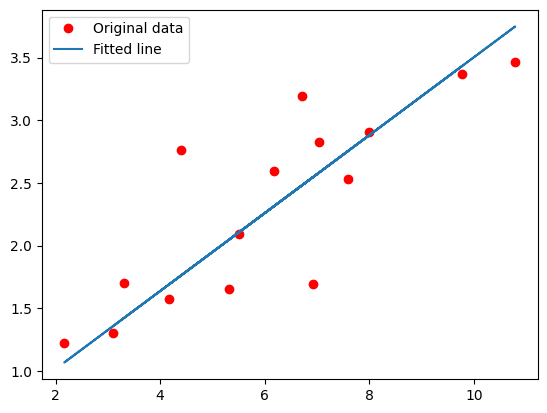

In [ ]:
predicted = model(torch.tensor(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

dictでモデルが取り出せるが、モデルのパラメタを別途直接指定したい、個別に取り出したい等の場合は、`torch.nn.Parameter`オブジェクトを扱う

- `torch.nn.Parameter`クラスの`__init__`関数にはtorchテンソルを指定することで、全体を設定できる

- 個別には次のようにする
  - `＜モデル名＞.＜レイヤー名＞.weight`プロパティに重みが指定できる
  - `＜モデル名＞.＜レイヤー名＞.baias`プロパティにバイアスが指定できる

- 既に述べた通り重みやバイアスといったパラメーターなどの`torch.nn.Module`全体の状態は、`＜モデル名＞.state_dict()`メソッドで取得できる
  - パラメーターを最適化で使う際は専用の取得方法があり、`＜モデル名＞.parameters()`メソッドで取得する

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3109]], requires_grad=True),
 Parameter containing:
 tensor([0.3932], requires_grad=True)]

## PyTorchでNNによる分類

### 学習データ
scikit-learnに含まれるワイン分類データセットを用いて、PyTorchでワインの等級分けを行う

- このデータセットには、13個の特徴量が含まれている
- 出力は本来class_0, 1, 2の3種類であるが、今回はclass_0,1のみを判別するため2つ用いる
- その他は次のようなモデルを想定する
  - 入力層(x)は13個:（特徴量に等しい）
  - 隠れ層(fc1): 全結合
  - 出力層(fc2): 全結合
  - softmax層: 判定するラベル数と同数の2ノード
    - 確率が足して1になるように調整する
 - 出力 ラベル0と1の確率

このネットワーク図は次の通り
- 記述とこの図の対応がとれるように
- このモデルはあくまでも練習用で精度はダメダメなことに注意(50%程度)
- 課題で精度向上を行います(90%超え)

<img src="http://class.west.sd.keio.ac.jp/dataai/text/model1.png" width=500>

復習として、Softmax関数は、$d$次元のベクトル${\bf y} \in \mathbb{R}^d$が与えられたとき、各次元の値の合計が1になるように正規化する

- すなわち、確率分布のような出力を任意の実数ベクトルから作ることができる

- ${\bf y}$の$i$番目の次元を$y_i$と書くと，Softmax関数は

$$
p_i = \frac{e^{y_i}}{\sum_{j=1}^d e^{y_j}}
$$

と表せる

### 学習

学習の流れは次の通り

- 順伝搬で出力を計算(図中①)
- 出力値と正解ラベルから誤差を計算(図中②)
- 重みによる誤差の偏微分値を計算(図中③)
- 誤差を逆伝搬(図中④)
- 更新した重みで500エポック計算

実装は、まずデータセットを準備し、次にネットワークを構成する

### 前準備
`import torch`としてtorchを利用

基本これだけでよいが、プログラムの記述上省略したほうが簡潔でよい、わかりやすいといった観点から、下記は必須ではないが、定義して省略形で使えるように準備する場合もある
- `import torch.nn as nn`: nnでニューラルネットワーク関数を参照
- `import tourch.nn.functional as F`： Fで活性化関数定義
- `import torch.optim as optim` ：optimで最適化関数定義
- `from torch.utils.data import DataLoader, TensorDataset` ：データローダ、データセット利用を簡略化

簡単にpython文法を復習する
- `import A.B`とすると、Aの中のBという機能を利用できる
  - この場合、使うたびにA.Bと名前を指定する
  - A全体を読み込むより、A.Bしか読み込まないためメモリ利用効率は向上するが、利用の便宜上は何も変わらない
  - そこで、`from A import B`とすると、読み込みもA.BのみでBとして利用できる
- as はエイリアス(別名定義)である
  - `import A.B as C`とすれば、Cという名前で当該機能を利用できる
- 両方まとめて`from A.B import C.D as E`とできる

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

scikit-learnをデータセット入手だけに利用する
- ワインのデータセット、およびデータセットから教師データとテストデータを分離する関数もscikit-learn提供の機能を利用する

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

pandasも利用する

In [ ]:
import pandas as pd

### 学習データの準備
####  ワインデータセットの読み込み
load_wineを用いてデータセットを読み込む

データの中身を煩雑だが確認する
- 13個の特徴点リストを含むデータセットである
- feature_namesは、13個の特徴点の名称を含むデータセットである
- targetは、dataそれぞれがどのワイン種別に属するかを表している正解ラベルである
- target_namesはワインのラベルで、class_0、 class_1といった等級分けである


In [ ]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

pandasのDataFrameを用いて、feature_namesをラベルとしてデータを表示する
- 中身をよりわかりやすく確認できる

In [ ]:
pd.DataFrame(wine.data, columns=wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


次に、2のラベルがついているデータを省いて、0と1だけにする

今回利用するデータが、たまたまクラスが0, 1, 2の順に並んでいるため、下記のようにすれば十分であるが、これでは汎用性がない

In [ ]:
wine_data2 = wine.data[0:130]
wine_target2 = wine.target[0:130]

今後のことも考え、pandasのdropを用い、より汎用性の高い方法で分離する

`pandas.DataFrame.drop(labels=None,axis=0,index=None,columns=None,level=None,inplace=False,errors=’raise’)`

とする

各パラメータは次の通り

- labels: ラベル名またはラベル名のリスト
  -  (省略可能)初期値None  
  -  消去したい列データor行データのラベルを指定
- axis: 0または`index`,1または`columns`
  -  (省略可能)初期値0  
  -  行データ(0または`index`)を削除するか列データ(1または`columns`)を削除するかを指定
- index,columns: ラベル名またはラベル名のリスト
  - (省略可能)初期値None  
  - 省略したいラベル名を行データ(index)、列データ(columns)で個別に指定
- level: intもしくは階層名
  -  (省略可能)初期値None  
  -  ラベルとして利用する階層を指定
- inplace: bool値
  - (省略可能)初期値False  
  - Trueでvoidとなり元データに変更を反映
- errors:	`ignore`または`raise`
  - (省略可能)初期値’raise’  
  - ‘ignore’でエラーを無視し処理続行

教師データ、正解ラベルの両方からclass2のデータを消す必要があるため、一度データをマージして削除する

ここでは、横方向に連結して、第0列が正解ラベル、第1列以降に特徴量データが並ぶようにデータセットを構成する

- データの連結には`pd.concat([df1, df4], axis=1)`とする
  - 横方向に連結するため axis=1 を指定
  - このとき紐付けは 連結方向でないラベル=index について行われる
  - 連結方向のラベルにあたる columns はそのまま維持される

pd.concat([wine.data,wine.target], axis=1)としたいところだが、型が合わないといわれるので変換する
- 暗黙でやれといいたい
- ラベルが勝手につくと厄介なので、ここでラベルを付けておく

In [ ]:
wine_cat = pd.concat([pd.DataFrame(wine.data, columns=wine.feature_names),
                      pd.DataFrame(wine.target, columns=['class'])], axis=1)
wine_cat.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


結合できたので、ここから、クラス2のデータを削除する

消す前に、練習として、classが2であるデータだけ抽出するには、次のようにする

In [ ]:
wine_cat[wine_cat['class'] == 2].head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0,2
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0,2
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560.0,2
133,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600.0,2
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0,2


あとで削除したときにどれだけ削除したかわかるように、データのサイズも確認しておく

In [ ]:
wine_cat.shape

(178, 14)

実際にデータを削除する
- これには、dropメソッドを使う
- 先に示したように、データはインデックスを使って選択が可能で、dropは該当したデータだけ削除する
- inplace=Trueとして、結果を易直接wine_catに代入する

In [ ]:
wine_cat[wine_cat['class']==2].index

Int64Index([130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
            143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
            156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
            169, 170, 171, 172, 173, 174, 175, 176, 177],
           dtype='int64')

In [ ]:
wine_cat.drop(wine_cat[wine_cat['class'] == 2].index, inplace=True)

行を抽出するのではなく列を抽出するため、`[:,:13]`となる
- 13であるが、これは0から12を意味する
  - 0から13個の情報、未満と解釈してもよい

In [ ]:
wine_data = wine_cat.values[:,:13]
wine_target = wine_cat.values[:,13]
print(wine_data, len(wine_data))
print(wine_target, len(wine_target))

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.179e+01 2.130e+00 2.780e+00 ... 9.700e-01 2.440e+00 4.660e+02]
 [1.237e+01 1.630e+00 2.300e+00 ... 8.900e-01 2.780e+00 3.420e+02]
 [1.204e+01 4.300e+00 2.380e+00 ... 7.900e-01 2.570e+00 5.800e+02]] 130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 130


### データセットの分割

データセットから取り出した特徴量XおよびラベルYについて、さらに「トレーニング用」と「テスト用」のデータに分割する


In [ ]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(wine_data, wine_target, test_size=0.25)

内容を確認する130$\times$0.25$\approx$33である。

In [ ]:
Train_X.shape, Test_X.shape

((97, 13), (33, 13))

### PyTorchテンソルへの変換と訓練データセット作成

from_numpyを使って変換(こちらはよくありますが古い書き方です)

In [ ]:
train_X = torch.from_numpy(Train_X).float()
train_Y = torch.from_numpy(Train_Y).long()
test_X = torch.from_numpy(Test_X).float()
test_Y = torch.from_numpy(Test_Y).long()

torch.tensorを使って変換

In [ ]:
train_X = torch.tensor(Train_X, dtype=torch.float)
train_Y = torch.tensor(Train_Y, dtype=torch.long)
test_X = torch.tensor(Test_X, dtype=torch.float)
test_Y = torch.tensor(Test_Y, dtype=torch.long)

今風かつ推奨の書き方

In [ ]:
train_X = torch.FloatTensor(Train_X)
train_Y = torch.LongTensor(Train_Y)
test_X = torch.FloatTensor(Test_X)
test_Y = torch.LongTensor(Test_Y)

中身を確認

In [ ]:
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

(torch.Size([97, 13]),
 torch.Size([33, 13]),
 torch.Size([97]),
 torch.Size([33]))

学習には、TensorDatasetを用いて一つのテンソルの中に入れる必要がある

In [ ]:
train = TensorDataset(train_X, train_Y)

中身を確認する

In [ ]:
train[0], len(train)

((tensor([1.1610e+01, 1.3500e+00, 2.7000e+00, 2.0000e+01, 9.4000e+01, 2.7400e+00,
          2.9200e+00, 2.9000e-01, 2.4900e+00, 2.6500e+00, 9.6000e-01, 3.2600e+00,
          6.8000e+02]),
  tensor(1)),
 97)

ちなみに、`train.view()`は失敗する
- このtrainは、ミニバッチ専用の型を持ち、テンソル型ではない
  - 以前のバージョンでは見えた気がするので、今後見えるかもしれない

In [ ]:
type(train)

torch.utils.data.dataset.TensorDataset

訓練データセットからミニバッチで順にデータを学習する
- ミニバッチではデータをミニバッチサイズ分まとめて並列的に学習させるため、入力させるデータの次元が一つ増えてミニバッチサイズ分束ねたテンソルとなる
  - PyTorchでは、入力される方(モデル)も対応して束ねたテンソルを受け付けることができるようになる
  - 自動化されているのでサイズなどは気にせずともよいが、込み入ると気にしないといけない場合もある
- ここでは、バッチサイズを15とする
  - かなり小さく、モデルにもよるがGPUなら100を超えてもよい
- shuffle=Trueとしてでたらめに並び替える
  - shuffleは、取り出すたびにランダムに取り出すのではない
  - まずデータをシャッフルして、その後順に取り出す、全てが取り出し終わったらもう一度シャッフルしてデータを作り直す、という処理が行われる
  - 訓練データは普通Trueを指定

In [ ]:
train_loader = DataLoader(train, batch_size=15, shuffle=True)

### モデル定義

一番最初に述べたネットワークモデルを構築する。既に存在するクラスを継承して用いると簡単であるため、PyTorchでは通常継承して利用

- `__init__`は、インスタンス生成時に呼ばれるコンストラクタ(1)
- superは継承元の親クラスを意味し、その親クラスのコンストラクタを呼び出す(2)
- nn.Linierでは、全結合層を構成
  - 入力の数を13、中間層のノード数を128と指定する(3)
- さらに、128入力2出力の全結合層を構成(4)
- 次に、ネットワークにデータを通して出力値を求める関数を作成
  - 名前はforwardとする必要がある(5)
- fc1の活性化関数に例としてReLUを利用(6)
- その結果を次のfc2に投入(7)
- 値を返す(8)
  - 本来は最後にsoftmax関数を配置するが、次のノートブックで説明するようにPyTorchのCrossEntropyLoss処理はsoftmax処理も内包しているため、この場合softmax関数は不要
  - もしここでSoftmaxを指定する場合は、どの軸に対してsoftmaxを施すかを指定するためdim=0とする
    - 各自試すと良いが、誤ってsoftmaxを指定した場合でも、学習に失敗するといったことはないであろう
  - 結果を出力するため、戻り値をreturnする

In [ ]:
class Net(nn.Module):
  def __init__(self): #(1)
    super(Net, self).__init__() #(2)
    self.fc1 = nn.Linear(13, 128) #(3)
    self.fc2 = nn.Linear(128, 2) #(4)
  def forward(self, x): #(5)
    x = F.relu(self.fc1(x)) #(6)
    x = self.fc2(x) #(7)
    return x #(8)

インスタンス化してmodelを作成する
- このmodelにデータを投入する

In [ ]:
model = Net()

### 学習の実行

損失をどのように定義するかを決定する
- 今回は交差エントロピーを利用する
- また、確率的勾配効果法SGDを利用して最適値へと漸近させる

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

今回は500回エポックを廻す
- 損失を格納する変数を0で初期化しておく(1)
- ミニバッチからデータを順次取り出して、train_xとtrain_yに格納する(2)  
- 初期勾配を0にする(3)
- 図の①に相当するforward計算を行う。これには、modelにtrain_xを渡せばよい(4)
- 図の②に相当する損失計算を行う。すでに宣言したcriterionに、計算結果と教師データを渡す(5)
- 図の③に相当する処理として、ロスを後方に伝搬させる(6)
- 図の④に相当する処理として、その結果を用いてパラメータを更新する(7)
- 毎回のlossの値を積算する(8)
- 2回に一度結果を表示して確認する。epochは0スタートであることに注意する(9)

In [ ]:
for epoch in range(500):
  total_loss = 0 #(1)
  for train_x, train_y in train_loader: #(2)
    optimizer.zero_grad() #(3)
    output = model(train_x) #(4)
    loss = criterion(output, train_y) #(5)
    loss.backward() #(6)
    optimizer.step() #(7)
    total_loss += loss.data #(8)
  if(epoch+1)%10 == 0: #(9)
    print(epoch+1, total_loss)

10 tensor(4.8303)
20 tensor(4.8030)
30 tensor(4.8097)
40 tensor(4.8076)
50 tensor(4.7932)
60 tensor(4.8068)
70 tensor(4.8228)
80 tensor(4.8066)
90 tensor(4.7905)
100 tensor(4.7900)
110 tensor(4.8592)
120 tensor(4.7900)
130 tensor(4.8058)
140 tensor(4.8580)
150 tensor(4.7889)
160 tensor(4.8226)
170 tensor(4.8058)
180 tensor(4.8065)
190 tensor(4.7554)
200 tensor(4.7548)
210 tensor(4.8239)
220 tensor(4.7729)
230 tensor(4.8245)
240 tensor(4.7886)
250 tensor(4.7881)
260 tensor(4.8434)
270 tensor(4.8404)
280 tensor(4.8413)
290 tensor(4.7890)
300 tensor(4.8056)
310 tensor(4.7885)
320 tensor(4.7889)
330 tensor(4.8405)
340 tensor(4.8415)
350 tensor(4.8235)
360 tensor(4.7723)
370 tensor(4.8063)
380 tensor(4.8401)
390 tensor(4.8057)
400 tensor(4.8231)
410 tensor(4.8404)
420 tensor(4.8056)
430 tensor(4.8066)
440 tensor(4.8061)
450 tensor(4.8243)
460 tensor(4.7908)
470 tensor(4.8230)
480 tensor(4.8224)
490 tensor(4.8070)
500 tensor(4.8056)


### 精度の計算
まずは値を取り出して、testに対する答えを出す
- `.detach`は、含まれている勾配を計算する演算情報を削除することができる


In [ ]:
test_model = model(test_X).detach()

その結果と1の大きい方を結果とする
- test_yのデータと比較して、等しければ1、違っていれば0とし、全部足し合わせる
- その値を、データの総数で割り、平均を求める

In [ ]:
test_model

tensor([[-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049],
        [-0.1240,  0.1049]])

この行列は、それぞれのtestに対する評価値を保存している
- クラス0と考えられる値および、クラス1と考えられる値のセットである

値の大きい方が「推定した答え」であるので、こちらを選別する
- このように行列で値の大きい方をまとめて選別する特別な関数 torch.maxが準備されている

まずは、torch.maxについて簡単に説明する

#### torch.maxについて

モデルの出力はデータ数×クラス数の行列である。正解データはデータ数次元のベクトルである。これを比較するのが、torch.maxである。データ数xクラス数の行列の結果を変換する。

torch.maxは、行列（ベクトル）の最大値とそのインデックスを返す。以下の例で確認する。

|  |  |  |
|--|--|--|
|0.2|	1.4|	1.7|
|0.3|	1.5|	0.7|
|1.1|	1.3|	0.4|
|0.9|	2.3|	0.5|

このような例について、考えてみると、

縦で見れば、02, 0.3, 1.1, 0.9で最もスコアが高いのは1.1である。したがって、第2行が選択される。同様に、2, 3, 0が選択されるとわかる。下記のセルで答えが一致することを確認する。また、戻り値は配列の配列であり、値で取得するのか、行もしくは列番号で取得するのかによって、取得する場所を変える。

まずは、無理やり上記の行列を評価可能なテンソル型にする。この変換自体も、型がどのように扱われているかの理解を進めるであろう。

その後、torch.maxで最大を抽出する
- 行・列どちらで判断するかを0か1で指定する
- 0を指定すると列、1を指定すると行でみて最大値を取り出す

なお、類似の関数にtorch.argmaxも準備されている
- 違いはアルゴリズムで、argmaxの方が計算速度を速くすることができるが、同じデータが並んでいた場合、torch.maxは必ず最初の要素を返すのに対して、argmaxは最初の値を返す保証がなくなるという問題がある
- torch.argmaxは最大値を与えることはできず、最大であるindexのみ返す

In [ ]:
import numpy as np
testX = np.array([[0.2, 1.4, 1.7],[0.3, 1.5, 0.7],[1.1, 1.3, 0.4],[0.9, 2.3, 0.5]])
x = torch.tensor(testX, requires_grad=False, dtype=torch.float) # 新しい書き方に修正しています
print(x)
value, index = torch.max(x.data, 0)
print("value0:", value, "index0:", index)
value, index = torch.max(x.data, 1)
print("value1:", value, "index1:", index)

tensor([[0.2000, 1.4000, 1.7000],
        [0.3000, 1.5000, 0.7000],
        [1.1000, 1.3000, 0.4000],
        [0.9000, 2.3000, 0.5000]])
value0: tensor([1.1000, 2.3000, 1.7000]) index0: tensor([2, 3, 0])
value1: tensor([1.7000, 1.5000, 1.3000, 2.3000]) index1: tensor([2, 1, 1, 1])


さて、本題にもどって最大を抽出する

In [ ]:
torch.max(test_model, 1)

torch.return_types.max(
values=tensor([0.1049, 0.1049, 0.1049, 0.1049, 0.1049, 0.1049, 0.1049, 0.1049, 0.1049,
        0.1049, 0.1049, 0.1049, 0.1049, 0.1049, 0.1049, 0.1049, 0.1049, 0.1049,
        0.1049, 0.1049, 0.1049, 0.1049, 0.1049, 0.1049, 0.1049, 0.1049, 0.1049,
        0.1049, 0.1049, 0.1049, 0.1049, 0.1049, 0.1049]),
indices=tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1]))

値が確認できたら、精度を求める

In [ ]:
result = torch.max(test_model, 1)[1]
accuracy = sum(test_Y.data.numpy() == result.numpy()) / len(test_Y.data.numpy())
accuracy

0.5151515151515151

現在の設計ではこの程度
- あえてうまくいかないようにネットワークを小さくしている
- シンプルには学習パラメータを変更して精度を上げることができる

# 課題1(PyTorch NN改良)

ワイン分類の精度90%超えを狙いなさい

ヒントとして、次の点を改良してみよう

**[改良1]** Learning Rate (lr)をより小さい値に変更すると、accuracyの値は向上するかどうか、実際に確認しなさい
- `optim.SGD(model.parameters(), lr=0.01)`のlrの値を指す
- あくまでも結果は今回の例に限定されることに注意する
  
**[改良2]** 次のネットワークの改善の方で同様にパラメータを調整

- 例えば、ネットワークを以下のように変更し、隠れ層をさらに深く、全結合層を5層に増やす

<img src="http://class.west.sd.keio.ac.jp/dataai/text/model2.png" width="70%">

以下、モデルの再定義例を示す
- 各自でaccuracyの値を確認しなさい

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(13, 128)
    self.fc2 = nn.Linear(128, 128)
    self.fc3 = nn.Linear(128, 128)
    self.fc4 = nn.Linear(128, 128)
    self.fc5 = nn.Linear(128, 128)
    self.fc6 = nn.Linear(128, 2)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = self.fc6(x)
    return x

## PyTorchで手書き文字認識

シンプルなディープラーニングの例を示す

- 手書き文字認識といえば、MNISTが定番であるが、ここではさらに簡便なscikit-learnに付属する手書き文字の認識を行う
- 高々3層なのでディープといえるかどうかは微妙だが…

scikit-learnから、手書き数字の画像データを読み込んで表示する

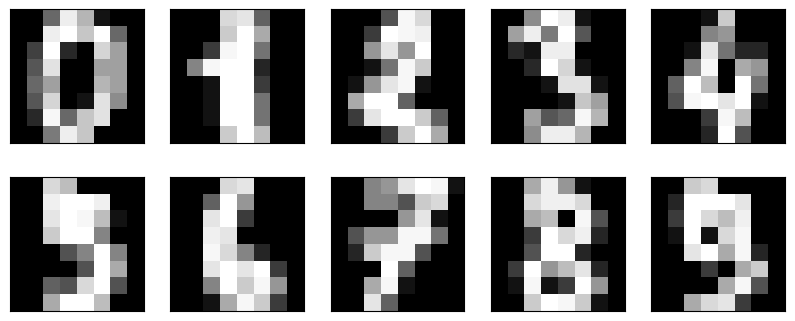

データの形状: (1797, 64)
ラベル: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
digits_data = datasets.load_digits()
n_img = 10  # 表示する画像の数
plt.figure(figsize=(10, 4))
for i in range(n_img):
  ax = plt.subplot(2, 5, i+1)
  plt.imshow(digits_data.data[i].reshape(8, 8), cmap="Greys_r")
  ax.get_xaxis().set_visible(False)  # 軸を非表示に
  ax.get_yaxis().set_visible(False)
plt.show()
print("データの形状:", digits_data.data.shape)
print("ラベル:", digits_data.target[:n_img])

画像サイズが8×8と小さい、つまり解像度が低いため、つぶれた画像になっている
- より解像度の高い画像の認識については改めて学びます
  - scikit-learnが持っている画像データは利用しやすいように小さく構成されています
- 例として、0から9までの手書き数字の画像を表示したが、この程度の解像度しかない

このような手書き数字の画像が、scikit-learnの手書き文字データセットには1797枚含まれている
- 各画像は正解となる描かれた数字を表すラベルとセットになっている


scikit-learnのtrain_test_splitを使って、データを訓練用とテストに分割する
- 本来はこの方法ではないが、最初なので無理やり使ってみる
- 真似しないように

In [ ]:
import torch
from sklearn.model_selection import train_test_split
digit_images = digits_data.data
labels = digits_data.target
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels)  # 25%がテスト用
# PyTorchで扱うためTensorに変換
x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64)
x_test = torch.tensor(x_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.int64)

`nn`モジュールの`Sequential`クラスによりモデルを構築する
- 今回は、あまり精度の良いモデルではないが、このサイズのデータセットであれば十分といえる
- 低解像度の画像は、ある意味畳み込み層やプーリング層を介した結果の画像ともいえなくもない

In [ ]:
from torch import nn
net = nn.Sequential(
  nn.Linear(64, 32),  # 全結合層
  nn.ReLU(),          # ReLU
  nn.Linear(32, 16),
  nn.ReLU(),
  nn.Linear(16, 10)   #0から9の10種の数字に対応
)
net

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)

学習として、モデルを訓練する

- 損失関数に交差エントロピー誤差を用い、最適化アルゴリズムにSGD(確率的勾配降下法)を用いる
- 引数に構築したネットワーク(net)のパラメータを渡す
- 順伝播は訓練データ、テストデータ両者で行い誤差を計算する
- 訓練データについてのみ、逆伝播により$w$や$b$を`step`メソッドで更新する
- 今回はバッチ学習で全部のデータを入力して誤差を求める

なお、`lossfn = nn.CrossEntropyLoss()`として\
`loss_train = lossfn(y_train, t_train)`などとする例の方が一般的である

注意事項として、すでに述べた通り、softmaxが存在していないが、CrossEntropyがSoftmax+CrossEntropyであるため、softmaxを明示的に記述する必要はない

In [ ]:
from torch import optim
# SGDを利用
optimizer = optim.SGD(net.parameters(), lr=0.01)  # 学習率は0.01
# 損失のログ
record_loss_train = []
record_loss_test = []
# 1000エポック学習
for i in range(1000):
  # 最初に勾配を初期化つまり0にする
  optimizer.zero_grad()
  # 順伝播
  y_train = net(x_train)
  y_test = net(x_test)
  # 交差エントロピー誤差で誤差を求める
  loss_train = nn.CrossEntropyLoss()(y_train, t_train)
  loss_test = nn.CrossEntropyLoss()(y_test, t_test)
  record_loss_train.append(loss_train.item()) # ゼロ次元テンソルからpythonの値を得るには.itemが便利
  record_loss_test.append(loss_test.item())
  # 逆伝播(勾配を求める)
  loss_train.backward()
  # パラメータの更新
  optimizer.step()
  if i%100 == 0:
    print("Epoch:", i, "Loss_Train:", loss_train.item(), "Loss_Test:", loss_test.item())

Epoch: 0 Loss_Train: 2.570627212524414 Loss_Test: 2.5978832244873047
Epoch: 100 Loss_Train: 0.7795366644859314 Loss_Test: 0.8279472589492798
Epoch: 200 Loss_Train: 0.2907576560974121 Loss_Test: 0.34824204444885254
Epoch: 300 Loss_Train: 0.18473675847053528 Loss_Test: 0.25056517124176025
Epoch: 400 Loss_Train: 0.13946892321109772 Loss_Test: 0.2124481201171875
Epoch: 500 Loss_Train: 0.11353681236505508 Loss_Test: 0.1928071528673172
Epoch: 600 Loss_Train: 0.09627588093280792 Loss_Test: 0.18182368576526642
Epoch: 700 Loss_Train: 0.0838443860411644 Loss_Test: 0.17515252530574799
Epoch: 800 Loss_Train: 0.07423904538154602 Loss_Test: 0.1710820347070694
Epoch: 900 Loss_Train: 0.06645631045103073 Loss_Test: 0.16844381392002106


訓練データ、テストデータ両方の誤差の推移をグラフで表示する
どんどん誤差が低減しているのがわかるであろう

なお、追加で実行するとさらに削減できるが、削減幅はあまり期待できない

グラフを確認し、訓練データとテストデータの最終的な値がほぼ同じであることを確認する
- 異なる場合は過学習
- 同程度に誤差が大きい場合は学習不足

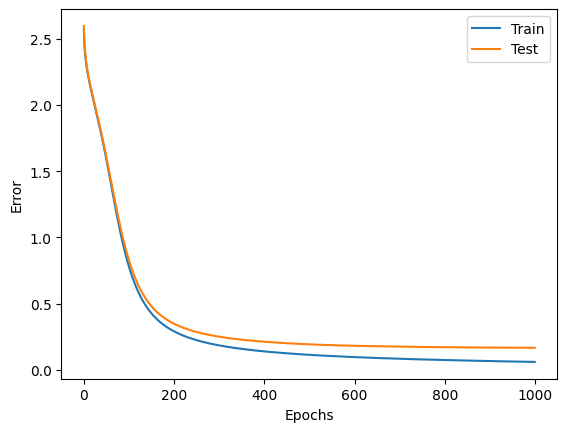

In [ ]:
plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()  # ラベルがあるときは、きちんとplt.show()を呼び出すこと

正答率を求めて、モデルの性能を確認する

ここでは、テストデータを用いる

In [ ]:
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print("正解率:", str(count/len(y_test)*100) + "%")

正解率: 96.66666666666667%


訓練済みのモデルを使って、任意のデータを入力し、予測させる

実際に、`img_id`を変更して任意の画像を入力し、モデルが機能していることを確かめよう

- 間違いを探そうとすると確率5%程度なので、20回に1回しか成功しないであろう

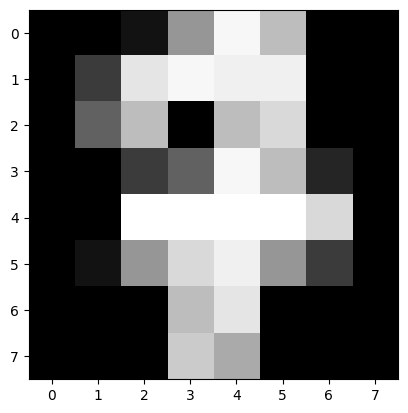

正解: 7 予測結果: 7


In [ ]:
img_id = 17   # ここを好きな数字IDに変更するとよい
x_pred = digit_images[img_id]
image = x_pred.reshape(8, 8)
plt.imshow(image, cmap="Greys_r")
plt.show()
x_pred = torch.tensor(x_pred, dtype=torch.float32)
y_pred = net(x_pred)
print("正解:", labels[img_id], "予測結果:", y_pred.argmax().item())

In [ ]:
y_pred

tensor([-4.2629,  1.8526, -5.1691, -0.2622,  3.6333, -3.3439, -3.2670,  8.2098,
        -0.4766, -0.1252], grad_fn=<AddBackward0>)

# PyTorch ver.2 からの新機能

PyTorch ver.2 より、新たにコンパイラ機能が搭載されている

これは、modelをコンパイルし、大きなモデルに対して、およそ5%から30%程度高速化し、VRAM仕様量もVRAM使用率も5から10%弱程度であるが現象する機能である
- CUDA 11.6以降が必要
- このテキストではCUDAを含むバージョンの関係から率先して利用していないが、個人でテキストを試す場合はぜひこのコンパイラ機能を試してみるとよいだろう(試験においても合法とみなします)

特長として以下の点が挙げられる
- 精度が低下することはないため安心して利用できる
- 小さなモデルに対して、学習は速くならず、コンパイルオーバヘッドのためepochsが少ない場合は全体として遅くなる
- GPU使用率は僅かに低くなる傾向
- GPUだけでなくCPUも効率良く使える場合は特に高い効果が期待できる

コンパイルオプションが様々存在するが、基本的にはデフォルトで問題ない

## 使い方

シンプルで、次のようにmodelをコンパイルして再定義するだけである

```
Python
# model: torch.nn.Module
model = torch.compile(model)
```

これほどよい仕組みであれば、デフォルトでONにしてもよいが、現状では意図してコンパイルする必要がある

なお、必ずコンパイルが成功するということは保証されていないため、コンパイルできない場合も存在する
- ただし、公式発表において、多くのモデルがコンパイル可能であることが示されている

GitHubにあるレポジトリには、Toolsディレクトリの下にgpu.pyがある
- これを用いれば、pytorchやCUDAのバージョンの他、GPU情報などを調べることができる

なお、仕組みとしてはJITに近く、最初の1回だけでなく数回呼び出しが遅くなる
- また、forwardとbackwardで別々にコンパイルされるため、両方初回は遅くなる
- Google Colabにおいても利用可能であるが、途中でCellの実行を一度止めて再実行するとエラーとなり、ランタイムの再起動が必要となる場合がある


# 課題2(PyTorch MNIST)

scikit-learnの手書き文字認識データを使ったPyTorchによる認識について改良を施す

レポート条件
- 上記の例の結果を添付する
- 改良し、上記よりも少ないエポック数で、上記よりも良い結果を得るモデルを作成して添付する
- 改良は、下記の点に限定すること
  - 指定箇所以外の変更で性能を向上するとチート行為とみなされる
  - ただし、改良の意図や背景理論を一緒に記述してより良い結果を出している場合は、これを評価する

改良点(以下の改良点をすべて適用したコードを生成して実行すること)
- ネットワーク[改良点1]
  - 「ここから」「ここまで」の範囲を修正
  - 層の数や、層のノード数を変更するとよい
- 最適化アルゴリズム[改良点2]
  - 修正は1行とすること、複数行になってはいけない
- エポック数[改良点3]
  - 修正は数字だけにすること

下記コード中に、改良点を施す場所を記載しており、また、上記のオリジナルコードも記載しているので、[改良点1]、[改良点2]、[改良点3]の部分を変更して条件を満たすこと

提出方法はこれまでと同様とする

In [ ]:
import torch
from sklearn import datasets
from sklearn.model_selection import train_test_split
digits_data = datasets.load_digits()
digit_images = digits_data.data
labels = digits_data.target
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels)
x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64)
x_test = torch.tensor(x_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.int64)

## モデルの工夫[改良点1]

最初の64と最後の10さえ守れば大丈夫(なはず)

In [ ]:
from torch import nn

net = nn.Sequential(
  # ここから「ここまで」のコードを変更すること
  nn.Linear(64, 32),  # 8x8の画像なので64からスタートするのは固定
  nn.ReLU(),
  nn.Linear(32, 16),
  nn.ReLU(),
  nn.Linear(16, 10)   #0から9の10種の数字に対応するので最後が10も固定
  # ここまで
)
net

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)

## 学習における最適化アルゴリズムの工夫[改良点2]

様々な最適化アルゴリズムが準備されている
- 学習した、しないに関わらず好きなモデルを使うと良い
- 次のwebページにマニュアルがあり各種最適化アルゴリズムが指定されている
  - https://pytorch.org/docs/stable/optim.html
  - 英語が嫌だという人へ、Googleの訳はこちら\
  https://translate.google.co.jp/translate?hl=ja&sl=en&tl=ja&u=https%3A%2F%2Fpytorch.org%2Fdocs%2Fstable%2Foptim.html

何してよいかわからないという人は、ひとまず学んだadamを使ってみてはどうだろう

- マニュアルにはadamだけでも様々存在するようだが、シンプルなadamが準備されている
  - もちろんハイパーパラメータもいろいろあるが、全部デフォルトでやってみるとよい
  - adamの威力を知れるであろう
  - ついでに、AMSGradの指定についても調べておくと良い\
  現時点で一般的に高性能とされるのが、AMSGradであろう
  




## エポック数の削減[改良点3]

[改良点1][改良点2]によりエポック数を削減しても、良い結果を得ることができるであろう

- 特に、[改良点2]の工夫はエポック数削減に大きく寄与し、現状のままでは過学習気味になるであろう

そこで、エポック数を削減し調整すること

Epoch: 0 Loss_Train: 5.095797538757324 Loss_Test: 5.145599365234375


<ipython-input-50-938831e5af4b>:6: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(m.weight)


Epoch: 100 Loss_Train: 0.5937900543212891 Loss_Test: 0.600522518157959
Epoch: 200 Loss_Train: 0.29230883717536926 Loss_Test: 0.309074342250824
Epoch: 300 Loss_Train: 0.19700653851032257 Loss_Test: 0.2273651361465454
Epoch: 400 Loss_Train: 0.14395621418952942 Loss_Test: 0.18618614971637726
Epoch: 500 Loss_Train: 0.11033722013235092 Loss_Test: 0.16042263805866241
Epoch: 600 Loss_Train: 0.08766212314367294 Loss_Test: 0.14036911725997925
Epoch: 700 Loss_Train: 0.07221318781375885 Loss_Test: 0.1268022507429123
Epoch: 800 Loss_Train: 0.06101883947849274 Loss_Test: 0.11728187650442123
Epoch: 900 Loss_Train: 0.05236244946718216 Loss_Test: 0.1101849302649498


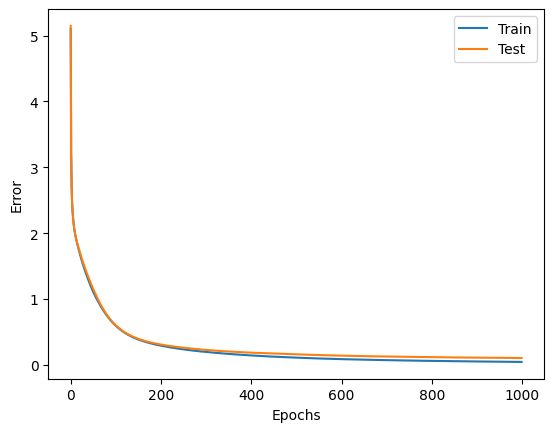

正解率: 96.22222222222221%


In [ ]:
from torch import optim
# 次の部分は、何度実行しても「追加で学習」ではなく「最初から学習しなおし」になるように
# 詳細は省略しますが(学習が進むと説明があります)モデルのパラメータをXavier法で初期化しています
def init_weights(m):
  if type(m) == nn.Linear:
    torch.nn.init.xavier_uniform(m.weight)
    m.bias.data.fill_(0.01)
net.apply(init_weights)
# 初期化されますので、今回はこのセルを何度実行しなおしても大丈夫です。
# 通常は、実行を繰り返すたび、エポックは戻らず、どんどん進んで過学習に向かいます
lossfn = nn.CrossEntropyLoss()
optimizer =  optim.SGD(net.parameters(), lr=0.01) #[変更点2] #Q2
record_loss_train = []
record_loss_test = []
for i in range(1000): #[変更点3] #Q3
  optimizer.zero_grad()
  y_train = net(x_train)
  y_test = net(x_test)
  loss_train = lossfn(y_train, t_train)
  loss_test = lossfn(y_test, t_test)
  record_loss_train.append(loss_train.item())
  record_loss_test.append(loss_test.item())
  loss_train.backward()
  optimizer.step()
  if i%100 == 0:
    print("Epoch:", i, "Loss_Train:", loss_train.item(), "Loss_Test:", loss_test.item())
import matplotlib.pyplot as plt
plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print("正解率:", str(count/len(y_test)*100) + "%")

今回の課題は、実際にロス曲線を記述するので、ロス曲線を見て判断することも練習してみよう。

皆さんの結果は、上記のロス曲線と比較してどうだろうか？

- 改めて、過学習は、TESTデータつまり検証用データのロスが、TRAINデータつまり訓練用データのロスがよくなる(小さくなる)に伴ってよくなる(小さくなる)のですが、途中で転じて良くなった後、また悪くなる状態を言います。
  - この場合、過学習にならないようにエポックを減らします。
  - 上記の場合、過学習がみられないことから、エポック数も適切と判断できます。

- また、上記は、訓練データも検証データも十分ロスが小さくなっているので、モデルは正解、と判断できますし、良い結果が期待できます。
  - 学習データと訓練データに少しの差があるのは当然です。問題が異なりますから、出来は異なります。
  - 差が開いているといっても、極端に開いている場合ですが、これはモデルが学習データに特化しすぎていることや、そもそもデータセットがうまく作ることができていないことが想定されます
  - 学習データでロスの値が小さいのに、訓練データがよくない場合、極端に差が開いているという観点で判断してください。モデルが学習データに合致しすぎて汎化性能が低下している、ということになります。